In [1]:
# Анализ данных из Росстат

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
%pip install openpyxl


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



                                              0.0/250.0 kB ? eta -:--:--
                                              0.0/250.0 kB ? eta -:--:--
                                              0.0/250.0 kB ? eta -:--:--
                                              0.0/250.0 kB ? eta -:--:--
                                              0.0/250.0 kB ? eta -:--:--
                                              0.0/250.0 kB ? eta -:--:--
                                              0.0/250.0 kB ? eta -:--:--
                                              0.0/250.0 kB ? eta -:--:--
                                              0.0/250.0 kB ? eta -:--:--
                                              0.0/250.0 kB ? eta -:--:--
                                              0.0/250.0 kB ? eta -:--:--
                                              0.0/250.0 kB ? eta -:--:--
                                              0.0/250.0 kB ? eta -:--:--
                                              0.0/

In [8]:
# загрузка данных
df_0 = pd.read_excel("data/sred_potreb_cen_1991-2022.xlsx", sheet_name= '1', skiprows=2, decimal=',')
df_0.head()

,ПОКАЗАТЕЛИ,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Средние потребительские цены на отдельные виды...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Говядина (кроме бескостного мяса),15.54,221.5,2201.27,5186.28,12547,14137,15787,30.04,42.01,...,244.55,272.28,314.94,315.02,320.34,330.58,350.05,361.04,416.46,484.17
2,Свинина (кроме бескостного мяса),14.38,260,2672.81,6579.38,15053,16810,19055,33.99,43.37,...,214.18,272.36,271.08,264.32,255.87,275.26,264.55,269.14,311.84,307.92
3,Куры охлажденные и мороженые1),13.57,194.76,2238.98,5677.09,11587,13815,16061,30.74,39.28,...,107.03,136.14,133.73,138.49,126.29,151.27,143.13,145.55,183.54,178.22
4,Колбаса вареная2),17,271,3351.3,8984.1,20016,22859,26767,43.81,61.56,...,302.94,310.54,344.81,351.27,360.88,382.98,399.37,406.84,450.57,480.16


In [10]:
# float(df_0.loc[62, 2010])

224.1

 Очистка

In [11]:
# удаление строк с пустыми значениями
df_1 = df_0.dropna()
df_1.head()

,ПОКАЗАТЕЛИ,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,Говядина (кроме бескостного мяса),15.54,221.5,2201.27,5186.28,12547,14137,15787,30.04,42.01,...,244.55,272.28,314.94,315.02,320.34,330.58,350.05,361.04,416.46,484.17
2,Свинина (кроме бескостного мяса),14.38,260,2672.81,6579.38,15053,16810,19055,33.99,43.37,...,214.18,272.36,271.08,264.32,255.87,275.26,264.55,269.14,311.84,307.92
3,Куры охлажденные и мороженые1),13.57,194.76,2238.98,5677.09,11587,13815,16061,30.74,39.28,...,107.03,136.14,133.73,138.49,126.29,151.27,143.13,145.55,183.54,178.22
4,Колбаса вареная2),17,271,3351.3,8984.1,20016,22859,26767,43.81,61.56,...,302.94,310.54,344.81,351.27,360.88,382.98,399.37,406.84,450.57,480.16
5,Консервы мясные3),8.87,163.9,1165.48,2991.46,6692,7375,7811,15.5,18.16,...,79.33,94.42,117.04,121.37,125.21,130.13,139.47,153.5,167.04,580.06


In [12]:
df_1.columns

Index([' ПОКАЗАТЕЛИ ',           1991,           1992,           1993,
                 1994,           1995,           1996,           1997,
                 1998,           1999,           2000,           2001,
                 2002,           2003,           2004,           2005,
                 2006,           2007,           2008,           2009,
                 2010,           2011,           2012,           2013,
                 2014,           2015,           2016,           2017,
                 2018,           2019,           2020,           2021,
                 2022],
      dtype='object')

In [13]:
# для удобства конвертируем значения ключей в строковой тип
df_1.columns = df_1.columns.astype("str")
df_1.columns

Index([' ПОКАЗАТЕЛИ ', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [14]:
df_1 = df_1.T
df_1.head()

,1,2,3,4,5,6,7,8,9,10,...,79,80,81,82,83,84,85,86,87,88
ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),Консервы мясные3),Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением ма...,Масло сливочное 6),"Масло подсолнечное7), за л",...,"Отопление, за Гкал","Газ сетевой, за месяц с человека",Электроэнергия в квартирах без электроплит за...,"Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день35)","Санаторий36), за день","Дом отдыха, пансионат37), за день",Первичный консультативный прием у врача-специа...,Общий анализ крови38)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,…,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,…,3.4,35.1,23.82,18.92,17.34,618.53,360.03,122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,…,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12984.99,5306.54,...,…,64.66,2682.71,1972.56,3186.69,955.52,35615.39,25380.81,7016.21,3470.18


In [15]:
# переименование индекса 'ПОКАЗАТЕЛИ' на 'годы'
df_1 = df_1.rename(index={' ПОКАЗАТЕЛИ ': "годы"})
df_1.head()

,1,2,3,4,5,6,7,8,9,10,...,79,80,81,82,83,84,85,86,87,88
годы,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),Консервы мясные3),Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением ма...,Масло сливочное 6),"Масло подсолнечное7), за л",...,"Отопление, за Гкал","Газ сетевой, за месяц с человека",Электроэнергия в квартирах без электроплит за...,"Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день35)","Санаторий36), за день","Дом отдыха, пансионат37), за день",Первичный консультативный прием у врача-специа...,Общий анализ крови38)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,…,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,…,3.4,35.1,23.82,18.92,17.34,618.53,360.03,122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,…,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12984.99,5306.54,...,…,64.66,2682.71,1972.56,3186.69,955.52,35615.39,25380.81,7016.21,3470.18


In [16]:
# в качестве ключей устанавливаем категории товаров и услуг
df_1.columns = df_1.loc["годы", :]
df_1 = df_1.drop("годы")
df_1.head()

годы,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),Консервы мясные3),Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением масла5),Масло сливочное 6),"Масло подсолнечное7), за л",...,"Отопление, за Гкал","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления34), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день35)","Санаторий36), за день","Дом отдыха, пансионат37), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови38)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,…,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,…,3.4,35.1,23.82,18.92,17.34,618.53,360.03,122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,…,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12984.99,5306.54,...,…,64.66,2682.71,1972.56,3186.69,955.52,35615.39,25380.81,7016.21,3470.18
1995,12547,15053,11587,20016,6692,8325,17488,8050,20075,10460,...,…,951,8077,3886,6185,2638,90428,60847,20704,10471


In [17]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 1991 to 2022
Data columns (total 86 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0   Говядина (кроме бескостного мяса)                                                                 32 non-null     object
 1   Свинина (кроме бескостного мяса)                                                                  32 non-null     object
 2   Куры охлажденные и мороженые1)                                                                    32 non-null     object
 3   Колбаса вареная2)                                                                                 32 non-null     object
 4   Консервы мясные3)                                                                                 32 non-null     object
 5   Рыба морож

In [18]:
df_1.columns

Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3)', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая ',
       'Консервы рыбные натуральные и с добавлением масла5)',
       'Масло сливочное 6) ', 'Масло подсолнечное7), за л',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности8), за л',
       'Сыры сычужные твердые и мягкие', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки различных сортов9)',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта10)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка крепостью 40% об.спирта и выше11), за л',
       'Коньяк ординарный отечественный12), за  л',
       'Вино игристое отечественное13), за  л', 'Пиво14), за л',
       

In [19]:
df_1['Говядина (кроме бескостного мяса)'].unique()

array([15.54, 221.5, 2201.27, 5186.28, 12547, 14137, 15787, 30.04, 42.01,
       52.72, 70.33, 72.56, 73.9, 93.41, 115.77, 131.67, 139.49, 174.86,
       185.6, 197.64, 234.49, 248.47, 244.55, 272.28, 314.94, 315.02,
       320.34, 330.58, 350.05, 361.04, 416.46, 484.17], dtype=object)

In [20]:
# конвертируем данные в числа с плавающей точкой
df_1 = df_1.astype("float")

ValueError: could not convert string to float: '…'

In [22]:
# замена '...' на 0
df_1 = df_1.replace('...', 0)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 1991 to 2022
Data columns (total 86 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Говядина (кроме бескостного мяса)                                                                 32 non-null     float64
 1   Свинина (кроме бескостного мяса)                                                                  32 non-null     float64
 2   Куры охлажденные и мороженые1)                                                                    32 non-null     float64
 3   Колбаса вареная2)                                                                                 32 non-null     float64
 4   Консервы мясные3)                                                                                 32 non-null     float64
 5   Рыб

In [23]:
df_1["Еврошифер20), за 10 м2"].unique()

array(['…', 0, 31986.77, 99732, 118529, 126831, 139.32, 213.93, 269.5,
       335.63, 398.32, 460.27, 508.15, 646.24, 734.86, 913.71, 1142.04,
       1144.83, 1154.66, 1232.19, 1289.04, 1368.75, 1425.95, 1494.21,
       1535.18, 2717.7, 2752.78, 2949.49, 3109.3, 4151.1, 4460.36],
      dtype=object)

In [24]:
# замена '...' на 0
df_1 = df_1.replace(0)

C:\Users\pc\AppData\Local\Temp\ipykernel_3384\4173556638.py:2: FutureWarning: DataFrame.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df_1 = df_1.replace(0)


In [27]:
# проверка ключей
df_1.columns

Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3)', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая',
       'Консервы рыбные натуральные и с добавлением масла5)',
       'Масло сливочное 6)', 'Масло подсолнечное7), за л',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности8), за л',
       'Сыры сычужные твердые и мягкие', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки различных сортов9)',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта10)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка крепостью 40% об.спирта и выше11), за л',
       'Коньяк ординарный отечественный12), за  л',
       'Вино игристое отечественное13), за  л', 'Пиво14), за л',
       'П

In [26]:
# удаление лишних символов пробелы перед и после названия ключей
df_1.columns = df_1.columns.str.strip(" ")

In [28]:
# сохранение датафрейма в Excel
df_1.to_excel("data/my_sred_potreb_cen_1998_2022.xlsx")

Анализ

In [29]:
df_1.columns

Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3)', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая',
       'Консервы рыбные натуральные и с добавлением масла5)',
       'Масло сливочное 6)', 'Масло подсолнечное7), за л',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности8), за л',
       'Сыры сычужные твердые и мягкие', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки различных сортов9)',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта10)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка крепостью 40% об.спирта и выше11), за л',
       'Коньяк ординарный отечественный12), за  л',
       'Вино игристое отечественное13), за  л', 'Пиво14), за л',
       'П

In [30]:
df_1['Яблоки']

1991       7.00
1992     105.60
1993     941.21
1994    3122.06
1995    6038.00
1996    6601.00
1997    6985.00
1998      16.61
1999      23.28
2000      22.02
2001      27.59
2002      31.48
2003      31.72
2004      34.09
2005      36.87
2006      44.09
2007      48.62
2008      56.33
2009      53.51
2010      62.37
2011      63.59
2012      62.54
2013      63.26
2014      76.70
2015      87.43
2016      81.92
2017      88.57
2018      85.66
2019      90.29
2020     106.28
2021     100.63
2022     101.60
Name: Яблоки, dtype: float64

In [31]:
# срез датафрейма
df_2 = df_1.loc["1998":, :]
df_2.head()

годы,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),Консервы мясные3),Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением масла5),Масло сливочное 6),"Масло подсолнечное7), за л",...,"Отопление, за Гкал","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления34), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день35)","Санаторий36), за день","Дом отдыха, пансионат37), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови38)
1998,30.04,33.99,30.74,43.81,15.50,18.93,32.13,13.85,64.44,23.43,...,…,3.18,17.09,7.36,17.32,5.12,201.84,135.41,41.9,24.4
1999,42.01,43.37,39.28,61.56,18.16,23.83,47.89,19.96,66.83,25.74,...,…,4.31,25.4,13.09,25.12,7.9,264.25,197.9,52.67,31.22
2000,52.72,58.45,48.80,77.97,19.52,29.54,61.22,21.15,69.12,23.20,...,…,5.66,39.16,23.11,33.6,9.19,351.35,279.76,62.97,37.99
2001,70.33,79.22,56.92,96.01,24.07,36.57,75.98,25.08,71.73,33.07,...,…,6.89,52.31,34.39,45.08,11.57,444.06,352.04,76.6,46.89
2002,72.56,80.98,58.38,101.57,26.55,40.39,87.99,25.11,80.08,35.76,...,…,9.47,70.85,48.66,61.77,15.5,551.39,426.89,99.77,59.21


In [33]:
# средняя цена за товар
df_1['Сахар-песок'].mean()

513.2065625

In [35]:
df_2.columns

Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3)', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая',
       'Консервы рыбные натуральные и с добавлением масла5)',
       'Масло сливочное 6)', 'Масло подсолнечное7), за л',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности8), за л',
       'Сыры сычужные твердые и мягкие', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки различных сортов9)',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта10)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка крепостью 40% об.спирта и выше11), за л',
       'Коньяк ординарный отечественный12), за  л',
       'Вино игристое отечественное13), за  л', 'Пиво14), за л',
       'П

In [38]:
# во сколько раз изменилась средняя цена на товар за весь период
prod = 'Бензин автомобильный марки АИ-95, за л'

df_2.loc["2022", prod] / df_2.loc["2001", prod]

5.60589519650655

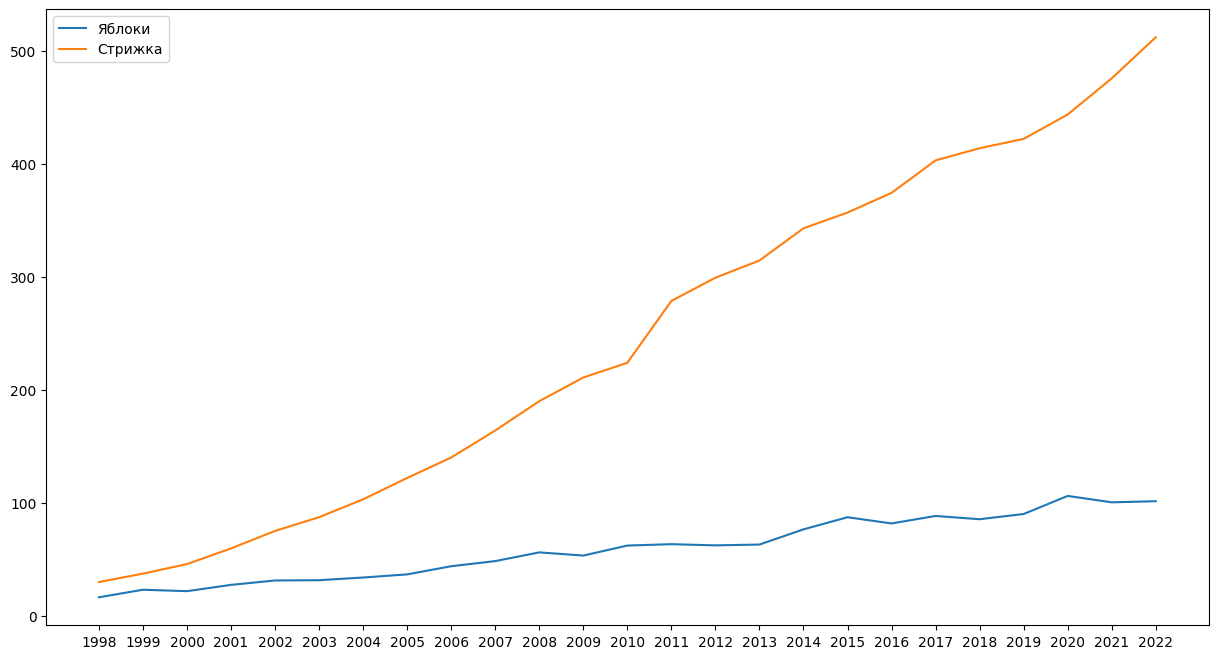

In [40]:
# визуализация 

plt.figure(figsize=(15, 8))

plt.plot(df_2.index, df_2["Яблоки"])
plt.plot(df_2.index, df_2["Стрижка модельная в мужском зале"])

plt.legend(["Яблоки", "Стрижка"])

plt.show()